In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation


import warnings
warnings.filterwarnings('ignore')
get_ipython().magic('matplotlib inline')
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:

df_train = pd.read_csv("train.csv")

In [5]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

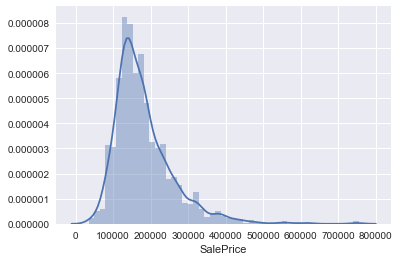

In [7]:
#Distribution of Sale Price of houses as histogram
sns.distplot(df_train['SalePrice']);

In [8]:
'''Skewness is usually described as a measure of a dataset’s symmetry – or lack of symmetry.   
A perfectly symmetrical data set will have a skewness of 0.   The normal distribution has a skewness of 0.
So, when is the skewness too much?  The rule of thumb seems to be:
If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
If the skewness is less than -1 or greater than 1, the data are highly skewed
Kurtosis is the degree of peakedness of a distribution” – Wolfram MathWorld
“We use kurtosis as a measure of peakedness (or flatness)” – Real Statistics Using Excel'''

#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())


Skewness: 1.882876
Kurtosis: 6.536282


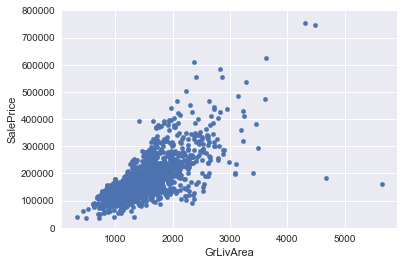

In [9]:
#scatter plot for Great living area vs saleprice.  It shows linear pattern.
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

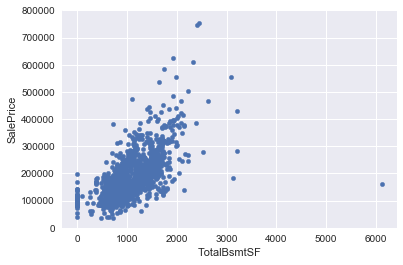

In [10]:
#Plot between Total Basement Square ft and Sale Price shows linear pattern.
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

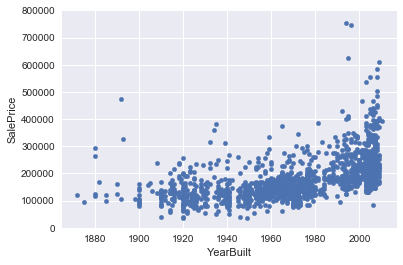

In [11]:
#Year built of house has linear relation with Sale price of the house.
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

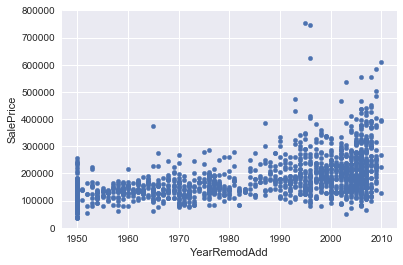

In [12]:
#Remodeled yr of house has linear relation with Sale price of the house.
var = 'YearRemodAdd'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

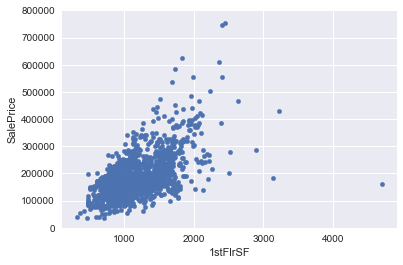

In [13]:
#Linear relationship between 1st floor sq ft and sale price.
var = '1stFlrSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000)); 

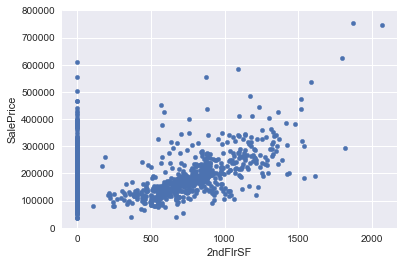

In [14]:
#Linear relationship between 2st floor sq ft and sale price.
var = '2ndFlrSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000)); 

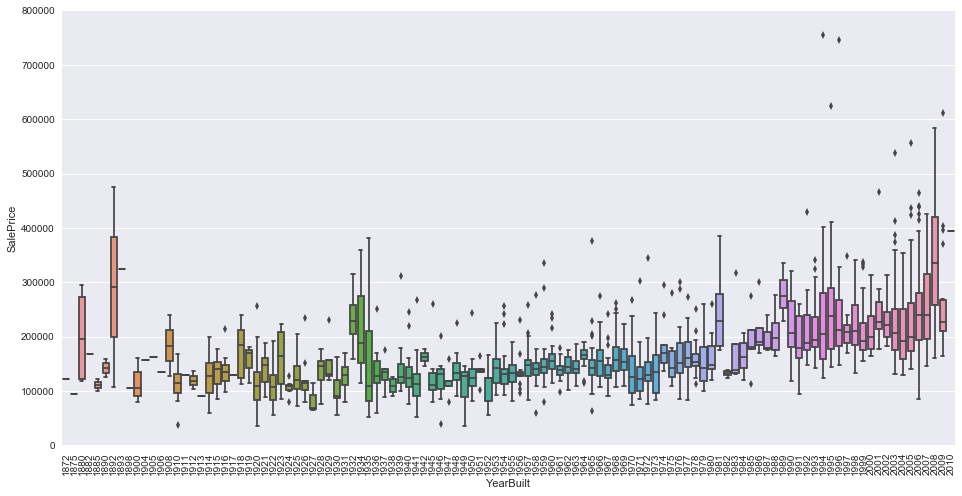

In [15]:
#Range of house price as per their year of built
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);


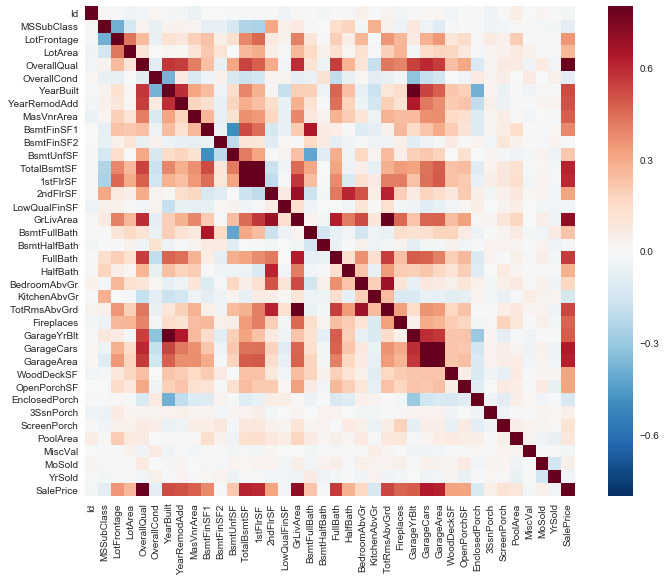

In [16]:
#Compute pairwise correlation of columns, excluding NA/null values
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [17]:
#Correlation of numerical variables with Sales Price
corrmat.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corrmat.SalePrice)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [18]:
df_test = pd.read_csv("test.csv")

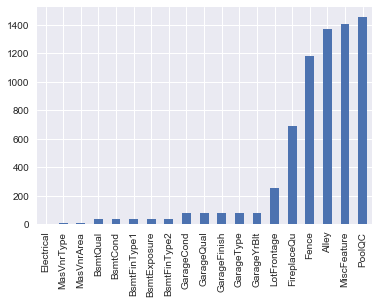

In [19]:
#Missing Values


missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [20]:
#Number of missing values and its percentage
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


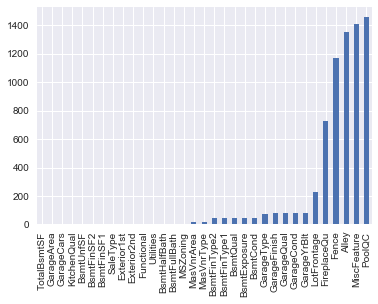

In [21]:
#Missing Values for test data

missing = df_test.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [22]:
#Number of missing values and its percentage
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [23]:
#Following columns are dropped and rest are kept as they are not acctually missing.
#dealing with missing data
df_train = df_train.drop(['Id','LotFrontage','MasVnrType','MasVnrArea','GarageYrBlt' ],1)

#df_test.head()
df_test = df_test.drop(['Id','LotFrontage','MasVnrType','MasVnrArea','GarageYrBlt'],1)


In [24]:
df_test.dropna(subset=['MSZoning','BsmtHalfBath'])
df_test=df_test.dropna(subset=['BsmtFullBath','GarageCars','GarageArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF'])

In [25]:
#df_train.head()
df_train.dropna(subset=['Electrical'])

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [26]:
df_train.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [27]:
#Converting Categorical variables into binary
#one_hot_encoded_training_predictors2 = pd.get_dummies(df_train)
#Add new data set for houses that are not for sale but would like to predict its values


#one_hot_encoded_training_predictors2 = pd.get_dummies(df_train)

one_hot_encoded_training_predictors = pd.get_dummies(df_train)
one_hot_encoded_test_predictors = pd.get_dummies(df_test)
final_train, final_test = one_hot_encoded_training_predictors.align(one_hot_encoded_test_predictors,
                                                                    join='left', 
                                                                    axis=1)


In [28]:
final_test.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,11622,5,6,1961,1961,468.0,144.0,270.0,882.0,...,0,0,0,1,0,0,0,0,1,0
1,20,14267,6,6,1958,1958,923.0,0.0,406.0,1329.0,...,0,0,0,1,0,0,0,0,1,0
2,60,13830,5,5,1997,1998,791.0,0.0,137.0,928.0,...,0,0,0,1,0,0,0,0,1,0
3,60,9978,6,6,1998,1998,602.0,0.0,324.0,926.0,...,0,0,0,1,0,0,0,0,1,0
4,120,5005,8,5,1992,1992,263.0,0.0,1017.0,1280.0,...,0,0,0,1,0,0,0,0,1,0


In [29]:
final_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,0,0,1,0,0,0,0,1,0
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,1,0,0,0,0,1,0
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,0,0,1,0,0,0,0,1,0
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,0,0,1,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,655,0,490,1145,...,0,0,0,1,0,0,0,0,1,0


In [30]:
final_test=final_test.drop(['SalePrice'],1)

In [31]:
final_test.head()

#fill missing values in final_test with 0 since those features are not available
final_test.fillna(0, inplace = True)

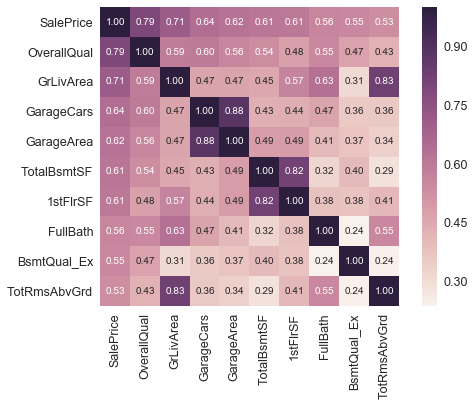

In [32]:
#saleprice correlation matrix
corrmat = final_train.corr()

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(final_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [33]:
final_train.corr()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
MSSubClass,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.069836,-0.065649,-0.140759,-0.238518,...,0.014005,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068
LotArea,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.214103,0.111170,-0.002618,0.260833,...,-0.015040,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.239666,-0.059119,0.308159,0.537808,...,-0.021172,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
OverallCond,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.046231,0.040229,-0.136841,-0.171098,...,-0.019779,-0.156175,-0.050663,0.163684,-0.046367,-0.038888,-0.033444,-0.023873,0.161642,-0.151659
YearBuilt,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.249503,-0.049107,0.149040,0.391452,...,-0.023431,0.346954,0.012122,-0.238463,-0.110233,-0.045601,-0.010104,-0.035785,-0.158427,0.343895
YearRemodAdd,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.128451,-0.067759,0.181133,0.291066,...,-0.039952,0.325647,-0.011431,-0.182733,-0.135942,-0.040294,-0.020727,-0.048056,-0.120577,0.322837
BsmtFinSF1,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,1.000000,-0.050117,-0.495251,0.522396,...,-0.017825,0.044883,0.010652,-0.024778,-0.024832,-0.014874,0.021369,0.000765,-0.019560,0.044912
BsmtFinSF2,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.050117,1.000000,-0.209294,0.104810,...,0.035715,-0.087162,-0.013098,0.036178,0.048347,-0.015130,-0.026277,-0.007929,0.041207,-0.085761
BsmtUnfSF,-0.140759,-0.002618,0.308159,-0.136841,0.149040,0.181133,-0.495251,-0.209294,1.000000,0.415360,...,-0.033900,0.249236,-0.002593,-0.198960,-0.023821,-0.034618,-0.059130,0.021534,-0.153930,0.249315
TotalBsmtSF,-0.238518,0.260833,0.537808,-0.171098,0.391452,0.291066,0.522396,0.104810,0.415360,1.000000,...,-0.039543,0.265644,0.003646,-0.212851,-0.032031,-0.055895,-0.047002,0.019569,-0.160222,0.266268


In [34]:
#Split Data into Train and test.

X = final_train.drop(['SalePrice'],1)
y = final_train['SalePrice']
#X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [35]:
#Linear Regression Model
lm = LinearRegression()

#Train the model
lm.fit(X, y)

#predict test data
#pred=lm.predict(X_test)
#lm.score(X_test, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
#Linear regression using cross validation
score =cross_validation.cross_val_score(lm,X,y,cv=5, scoring='mean_squared_error')
mse_score = -score
rmse_score = np.sqrt(mse_score)
rmse_score.mean()

35154.668387597521

In [42]:
#Random Forest regression
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X, y)
score1 =cross_validation.cross_val_score(rf,X,y,cv=5, scoring='mean_squared_error')
mse_score1 = -score1
rmse_score1 = np.sqrt(mse_score1)
rmse_score1.mean()

29921.695863803488

In [43]:
prediction=rf.predict(final_test)

In [44]:
df_test['Predicted_SalePrice'] = prediction

In [45]:
df_test.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Predicted_SalePrice
0,20,RH,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,128728.573
1,20,RL,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,155511.199
2,60,RL,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,179561.684
3,60,RL,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,182096.134
4,120,RL,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,198520.500


In [265]:
df_test.to_csv("test_prediction.csv", index=True, header=True)